<div style="text-align: center;">
  <img src="https://github.com/silvermete0r/oikan/blob/main/docs/media/oikan_logo.png?raw=true" width="120">
</div>

# OIKAN: Neuro-Symbolic ML for Scientific Discovery

OIKAN is a neuro-symbolic machine learning framework inspired by Kolmogorov-Arnold representation theorem. It combines the power of modern neural networks with techniques for extracting clear, interpretable symbolic formulas from data. OIKAN is designed to make machine learning models both accurate and Interpretable.

* GitHub: https://github.com/silvermete0r/oikan
* PyPI: https://pypi.org/project/oikan/

## 👋 Welcome to the OIKAN Get Started Template!

This notebook demonstrates how to use the OIKAN v0.0.3 library for both classification and regression tasks. It includes:
* Classification using the Iris dataset with `OIKANClassifier`.
* Regression using the California Housing dataset with `OIKANRegressor`.
* Extracting symbolic formulas, feature importances, and saving/loading models.

**`OIKAN v0.0.3` Usage Workflow:**

<img src="https://github.com/silvermete0r/oikan/blob/main/docs/media/oikan_v0.0.3_%20Usage-workflow-diagram.png?raw=True" width="600" alt="OIKAN v0.0.3 Usage Workflow">

# 1. Setup and Installation

In [1]:
# Install OIKAN v0.0.3 quietly
!pip install -qU oikan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 27.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pylibcugraph-cu12 24.12.0 requires pylibraft-cu12==24.12.*, but you have pylibraft-cu12 25.2.0 which is incompatible.
pylibcugraph-cu12 24.12.0 requires rmm-cu12==24.12.*, but you have rmm-cu12 25.2.0 which is incompatible.


In [2]:
# (Optional) Verify installation
!pip freeze | grep oikan

oikan==0.0.3.5


In [3]:
# (Optional) Create output directory for saving models
!mkdir -p outputs

# 2. Classification: Iris Dataset

In [4]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from oikan import OIKANClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Load Iris dataset
data = load_iris()
X, y = data.data, data.target
feature_names = data.feature_names

In [6]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Initialize OIKANClassifier
model = OIKANClassifier(
    hidden_sizes=[32, 32],
    activation='relu',
    augmentation_factor=10,
    alpha=0.1,
    sigma=0.1,
    epochs=100,
    lr=0.001,
    batch_size=32,
    top_k=10,
    evaluate_nn=False,
    verbose=True
)

In [8]:
# Fit the model
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/oikan/model.py:290: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(y, dtype=torch.float32))
Training: 100%|██████████| 100/100 [00:01<00:00, 87.37it/s, loss=0.1065]
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.116e+01, tolerance: 3.595e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.589e+0

Original data: features shape: (120, 4) | target shape: (120,)
Augmented data: features shape: (1200, 4) | target shape: (1200, 3)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.239e+02, tolerance: 2.669e+00
  model = cd_fast.enet_coordinate_descent(


In [9]:
# Make predictions
y_pred = model.predict(X_test)
print(y_pred)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [10]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 1.0000


In [11]:
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [12]:
# Get symbolic formulas for each class
print("\nSymbolic Formulas:")
formulas = model.get_formula()
for formula in formulas:
    print(formula)


Symbolic Formulas:
Class 0: 0.274668*x0 + 0.076111*x0^2 + 0.048240*x0 x1 + -0.267496*x0 x2 + -0.173120*x0 x3 + 0.606642*x1^2 + -0.163064*x1 x2 + -0.188301*x2^2 + 0.005589*x2^3 + 0.005265*exp_x2 + 0.243424*sin_x2 + 0.011370*x0^3 + -0.000764*exp_x0 + 0.001960*x1^3 + -0.079094*exp_x1
Class 1: 0.039987*x0^2 + 0.131826*x0 x2 + 0.161510*x1 x2 + -0.048085*x2^3 + 0.005046*exp_x2 + 0.000203*x0^3 + -0.000071*exp_x0 + -0.010228*x1^3 + -0.000807*exp_x1 + -0.070888*x3^3
Class 2: -0.344981*x0 + -0.010224*x1 + -0.088667*x0^2 + -0.046945*x0 x1 + 0.129855*x0 x2 + 0.201329*x0 x3 + -0.359172*x1^2 + 0.220650*x2^2 + 0.037321*x2 x3 + 0.018206*x2^3 + -0.007576*exp_x2 + -0.010013*x0^3 + 0.000722*exp_x0 + -0.011198*x1^3 + 0.064336*exp_x1


In [13]:
# Get feature importances
print("\nFeature Importances:")
importances = model.feature_importances()
print(importances)


Feature Importances:
[0.3341444  0.28293799 0.29556912 0.08734849]


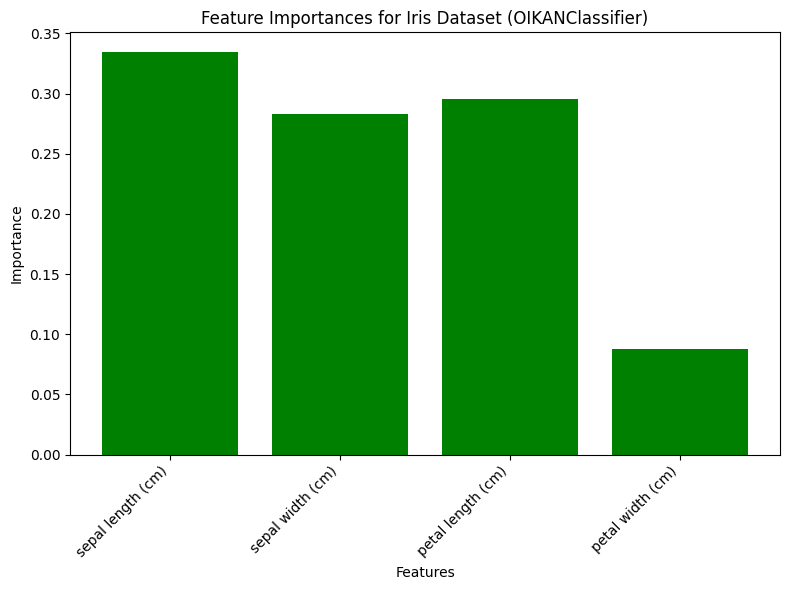

In [14]:
# Plot feature importances
plt.figure(figsize=(8, 6))
plt.bar(feature_names, importances, color='green')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances for Iris Dataset (OIKANClassifier)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [15]:
# Save the model
model.save("outputs/iris_model.json")

Model saved to outputs/iris_model.json


In [16]:
# Load the model
loaded_model = OIKANClassifier()
loaded_model.load("outputs/iris_model.json")

In [17]:
# Original formulas
print("Original Formulas:")
formulas_loaded = loaded_model.get_formula(type='original')
for formula in formulas_loaded:
    print(formula)

Original Formulas:
Class 0: 0.274668*x0 + 0.076111*x0^2 + 0.048240*x0 x1 + -0.267496*x0 x2 + -0.173120*x0 x3 + 0.606642*x1^2 + -0.163064*x1 x2 + -0.188301*x2^2 + 0.005589*x2^3 + 0.005265*exp_x2 + 0.243424*sin_x2 + 0.011370*x0^3 + -0.000764*exp_x0 + 0.001960*x1^3 + -0.079094*exp_x1
Class 1: 0.039987*x0^2 + 0.131826*x0 x2 + 0.161510*x1 x2 + -0.048085*x2^3 + 0.005046*exp_x2 + 0.000203*x0^3 + -0.000071*exp_x0 + -0.010228*x1^3 + -0.000807*exp_x1 + -0.070888*x3^3
Class 2: -0.344981*x0 + -0.010224*x1 + -0.088667*x0^2 + -0.046945*x0 x1 + 0.129855*x0 x2 + 0.201329*x0 x3 + -0.359172*x1^2 + 0.220650*x2^2 + 0.037321*x2 x3 + 0.018206*x2^3 + -0.007576*exp_x2 + -0.010013*x0^3 + 0.000722*exp_x0 + -0.011198*x1^3 + 0.064336*exp_x1


In [18]:
# Simplified formulas
print("\nSimplified Formulas:")
simplified_formulas = loaded_model.get_formula(type='sympy')
for formula in simplified_formulas:
    print(formula)


Simplified Formulas:
Class 0: 0.24342*sin(x2) + 0.00196*x1**3 + 0.27467*x0 + 0.00527*exp(x2) + 0.01137*x0**3 + 0.60664*x1**2 + 0.07611*x0**2 + 0.00559*x2**3 - 0.18830*x2**2 - 0.07909*exp(x1) - 0.00076*exp(x0) + 0.04824*x0*x1 - 0.16306*x1*x2 - 0.26750*x0*x2 - 0.17312*x0*x3
Class 1: 0.00020*x0**3 + 0.03999*x0**2 + 0.00505*exp(x2) - 0.00007*exp(x0) - 0.07089*x3**3 - 0.01023*x1**3 - 0.04809*x2**3 - 0.00081*exp(x1) + 0.16151*x1*x2 + 0.13183*x0*x2
Class 2: 0.22065*x2**2 + 0.06434*exp(x1) + 0.01821*x2**3 + 0.00072*exp(x0) - 0.01120*x1**3 - 0.01001*x0**3 - 0.34498*x0 - 0.00758*exp(x2) - 0.01022*x1 - 0.08867*x0**2 - 0.35917*x1**2 + 0.03732*x2*x3 + 0.12985*x0*x2 + 0.20133*x0*x3 - 0.04694*x0*x1


In [19]:
# LaTeX formulas
print("\nLaTeX Formulas:")
latex_formulas = loaded_model.get_formula(type='latex')
for formula in latex_formulas:
    print(formula)


LaTeX Formulas:
Class 0: 0.01137 x_{0}^{3} + 0.07611 x_{0}^{2} + 0.04824 x_{0} x_{1} - 0.2675 x_{0} x_{2} - 0.17312 x_{0} x_{3} + 0.27467 x_{0} + 0.00196 x_{1}^{3} + 0.60664 x_{1}^{2} - 0.16306 x_{1} x_{2} + 0.00559 x_{2}^{3} - 0.1883 x_{2}^{2} - 0.00076 e^{x_{0}} - 0.07909 e^{x_{1}} + 0.00527 e^{x_{2}} + 0.24342 \sin{\left(x_{2} \right)}
Class 1: 0.0002 x_{0}^{3} + 0.03999 x_{0}^{2} + 0.13183 x_{0} x_{2} - 0.01023 x_{1}^{3} + 0.16151 x_{1} x_{2} - 0.04809 x_{2}^{3} - 0.07089 x_{3}^{3} - 7.0 \cdot 10^{-5} e^{x_{0}} - 0.00081 e^{x_{1}} + 0.00505 e^{x_{2}}
Class 2: - 0.01001 x_{0}^{3} - 0.08867 x_{0}^{2} - 0.04694 x_{0} x_{1} + 0.12985 x_{0} x_{2} + 0.20133 x_{0} x_{3} - 0.34498 x_{0} - 0.0112 x_{1}^{3} - 0.35917 x_{1}^{2} - 0.01022 x_{1} + 0.01821 x_{2}^{3} + 0.22065 x_{2}^{2} + 0.03732 x_{2} x_{3} + 0.00072 e^{x_{0}} + 0.06434 e^{x_{1}} - 0.00758 e^{x_{2}}


# 3. Regression: California Housing Dataset

In [20]:
# Import necessary libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from oikan import OIKANRegressor
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
# Load California Housing dataset
data = fetch_california_housing()
X, y = data.data, data.target
feature_names = data.feature_names

In [22]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Initialize OIKANRegressor
from oikan import OIKANRegressor
model = OIKANRegressor(
    hidden_sizes=[32, 32],
    activation='relu',
    augmentation_factor=5,
    alpha=0.1,
    sigma=0.1,
    epochs=100,
    lr=0.001,
    batch_size=32,
    top_k=10,
    evaluate_nn=False,
    verbose=True
)

In [24]:
# Fit the model
model.fit(X_train, y_train)

Training: 100%|██████████| 100/100 [01:28<00:00,  1.13it/s, loss=0.4450]


Original data: features shape: (16512, 8) | target shape: (16512, 1)
Augmented data: features shape: (82560, 8) | target shape: (82560, 1)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.753e+03, tolerance: 3.979e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.079e+03, tolerance: 3.979e+01
  model = cd_fast.enet_coordinate_descent(


In [25]:
# Make predictions
y_pred = model.predict(X_test)
print(y_pred)

[0.33575473 1.12348425 2.55532374 ... 3.94359974 1.06253175 1.42608905]


In [26]:
# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

Mean Squared Error: 0.7298
R^2 Score: 0.4431


In [27]:
# Get symbolic formula
print("\nSymbolic Formula:")
formula = model.get_formula()
print(formula)


Symbolic Formula:
0.023590*x1 + 0.000443*x4 + -0.004924*x7 + 0.058613*x0^2 + 0.002920*x0 x1 + 0.000023*x0 x4 + 0.006020*x0 x5 + 0.001722*x0 x6 + -0.000683*x0 x7 + -0.000947*x1^2 + -0.000761*x1 x2 + 0.000003*x1 x4 + -0.000956*x1 x5 + -0.000288*x1 x6 + -0.000064*x1 x7 + 0.002711*x2^2 + -0.000030*x2 x4 + -0.003952*x2 x6 + 0.000218*x2 x7 + 0.000014*x3 x4 + -0.003814*x3 x7 + 0.000015*x4 x5 + -0.000001*x4 x6 + 0.000003*x4 x7 + 0.000173*x5^2 + 0.000259*x5 x6 + 0.001149*x5 x7 + 0.000265*x6^2 + -0.000055*x6 x7 + 0.000018*x7^2 + 0.000015*x1^3 + 0.000002*exp_x1 + -0.003508*x0^3 + -0.000018*exp_x0 + 0.000047*exp_x5 + 0.206907*sin_x5 + -0.000007*x2^3 + 0.000014*exp_x2 + -0.000017*x6^3 + 0.000015*exp_x6 + -0.000788*x3^3 + -0.000060*exp_x3 + -0.000024*exp_x4


In [28]:
# Get feature importances
print("\nFeature Importances:")
importances = model.feature_importances()
print(importances)


Feature Importances:
[0.21061665 0.08466014 0.02204204 0.01339852 0.00159237 0.61753723
 0.01884272 0.03131033]


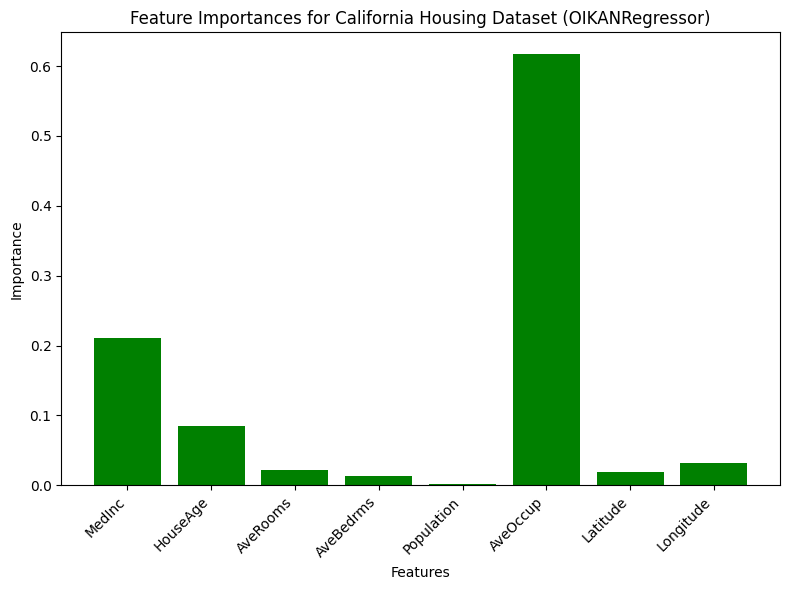

In [29]:
# Plot feature importances
plt.figure(figsize=(8, 6))
plt.bar(feature_names, importances, color='green')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances for California Housing Dataset (OIKANRegressor)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [30]:
# Save the model
model.save("outputs/california_housing_model.json")

Model saved to outputs/california_housing_model.json


In [31]:
# Load the model
loaded_model = OIKANRegressor()
loaded_model.load("outputs/california_housing_model.json")

In [32]:
# Original formula
print("Original Formula:")
formula_loaded = loaded_model.get_formula(type='original')
print(formula_loaded)

Original Formula:
0.023590*x1 + 0.000443*x4 + -0.004924*x7 + 0.058613*x0^2 + 0.002920*x0 x1 + 0.000023*x0 x4 + 0.006020*x0 x5 + 0.001722*x0 x6 + -0.000683*x0 x7 + -0.000947*x1^2 + -0.000761*x1 x2 + 0.000003*x1 x4 + -0.000956*x1 x5 + -0.000288*x1 x6 + -0.000064*x1 x7 + 0.002711*x2^2 + -0.000030*x2 x4 + -0.003952*x2 x6 + 0.000218*x2 x7 + 0.000014*x3 x4 + -0.003814*x3 x7 + 0.000015*x4 x5 + -0.000001*x4 x6 + 0.000003*x4 x7 + 0.000173*x5^2 + 0.000259*x5 x6 + 0.001149*x5 x7 + 0.000265*x6^2 + -0.000055*x6 x7 + 0.000018*x7^2 + 0.000015*x1^3 + 0.000002*exp_x1 + -0.003508*x0^3 + -0.000018*exp_x0 + 0.000047*exp_x5 + 0.206907*sin_x5 + -0.000007*x2^3 + 0.000014*exp_x2 + -0.000017*x6^3 + 0.000015*exp_x6 + -0.000788*x3^3 + -0.000060*exp_x3 + -0.000024*exp_x4


In [33]:
# Simplified formula
print("\nSimplified Formula:")
simplified_formula = loaded_model.get_formula(type='sympy')
print(simplified_formula)


Simplified Formula:
0.20691*sin(x5) + 0.05861*x0**2 + 0.00027*x6**2 + 0.00271*x2**2 + 0.00017*x5**2 + 0.02359*x1 + 0.00044*x4 - 0.00351*x0**3 - 0.00095*x1**2 - 0.00492*x7 - 0.00079*x3**3 - 0.00006*exp(x3) + 0.00022*x2*x7 + 0.00026*x5*x6 + 0.00172*x0*x6 + 0.00115*x5*x7 + 0.00292*x0*x1 + 0.00602*x0*x5 - 0.00006*x1*x7 - 0.00381*x3*x7 - 0.00096*x1*x5 - 0.00029*x1*x6 - 0.00006*x6*x7 - 0.00395*x2*x6 - 0.00068*x0*x7 - 0.00076*x1*x2


In [34]:
# LaTeX formula
print("\nLaTeX Formula:")
latex_formula = loaded_model.get_formula(type='latex')
print(latex_formula)


LaTeX Formula:
- 0.00351 x_{0}^{3} + 0.05861 x_{0}^{2} + 0.00292 x_{0} x_{1} + 0.00602 x_{0} x_{5} + 0.00172 x_{0} x_{6} - 0.00068 x_{0} x_{7} - 0.00095 x_{1}^{2} - 0.00076 x_{1} x_{2} - 0.00096 x_{1} x_{5} - 0.00029 x_{1} x_{6} - 6.0 \cdot 10^{-5} x_{1} x_{7} + 0.02359 x_{1} + 0.00271 x_{2}^{2} - 0.00395 x_{2} x_{6} + 0.00022 x_{2} x_{7} - 0.00079 x_{3}^{3} - 0.00381 x_{3} x_{7} + 0.00044 x_{4} + 0.00017 x_{5}^{2} + 0.00026 x_{5} x_{6} + 0.00115 x_{5} x_{7} + 0.00027 x_{6}^{2} - 6.0 \cdot 10^{-5} x_{6} x_{7} - 0.00492 x_{7} - 6.0 \cdot 10^{-5} e^{x_{3}} + 0.20691 \sin{\left(x_{5} \right)}


### Potential Improvements:

* Add data preprocessing & feature engineering steps;
* Make visualizations using `matplotlib` / `seaborn`;
* Experiment with different hyperparameter values for better performance.


🙌 Thank you for using `OIKAN`! 